Trial salp_local_8a-gcn-test: 16 points
Trial salp_local_8a-transformer_encoder-test: 16 points


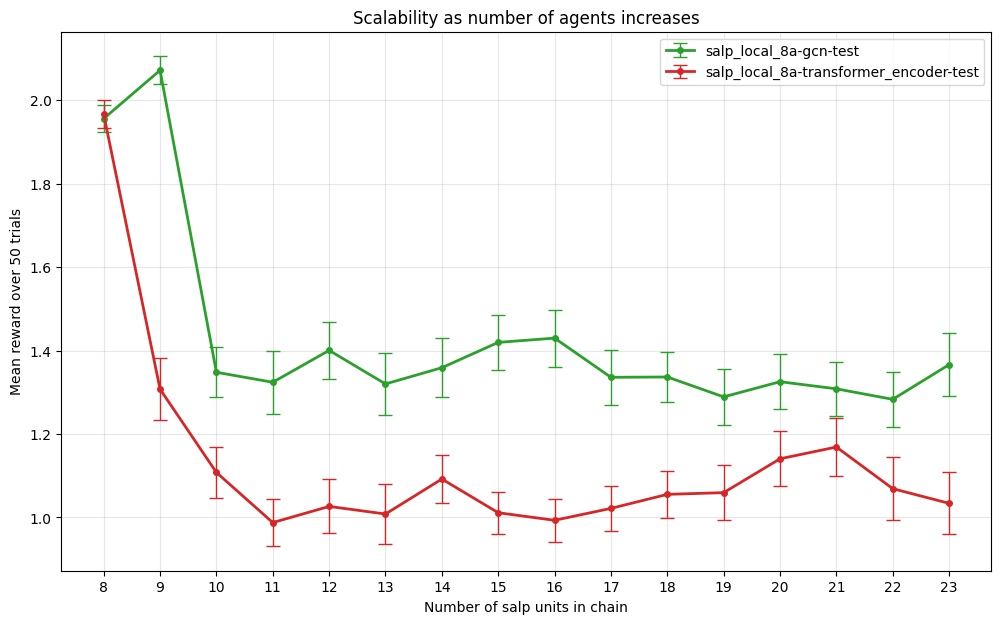

In [21]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import yaml
import pickle

plt.rcParams.update({'font.size': 16})

plotting_dir = Path().resolve()
config_dir = plotting_dir / "ppo_config.yaml"

with open(config_dir, "r") as file:
    config = yaml.safe_load(file)

data = []
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)

# Use a different color for each experiment-batch combination
experiment_colors = {}
color_idx = 0

for batch in config["batches"]:
    for experiment in config["experiments"]:

        # Use a single color for all trials of the same experiment
        exp_key = f"{batch}-{experiment}"
        if exp_key not in experiment_colors:
            experiment_colors[exp_key] = plt.cm.tab10(color_idx % 10)
            color_idx += 1
        
        for trial in config["trials"]:
            checkpoint_path = Path(f"{config['base_path']}/{batch}/{experiment}/{trial}/logs/evaluation.dat")

            if checkpoint_path.is_file():
                with open(checkpoint_path, "rb") as handle:
                    data = pickle.load(handle)
                    print(f"Trial {exp_key}-{trial}: {len(data)} points")

                    # Extract data
                    n_agents = list(data.keys())
                    rewards = [np.mean(data[n]) for n in n_agents]

                    # Calculate Standard Error of the Mean
                    errors = [np.std(data[n]) / np.sqrt(len(data[n])) if len(data[n]) > 1 else 0 for n in n_agents]
                    
                    # Get consistent color
                    color = experiment_colors[exp_key]

                    # Only use errorbar (which plots both the line and error bars)
                    # Remove the separate plot() call
                    ax.errorbar(
                        n_agents,
                        rewards,
                        yerr=errors,
                        fmt="o-",
                        linewidth=2,
                        elinewidth=1,
                        markersize=4,
                        capsize=5,
                        color=color,          # Set color for the line and markers
                        ecolor=color,         # Same color for error bars
                        label=f"{experiment}"  # Move label here
                    )

                    ax.set_xticks(n_agents)

ax.legend(loc='best')
ax.set_xlabel("Number of Salp Units in Salp Chain")
ax.set_ylabel("Mean Reward Over 50 Trials")
ax.set_title("Performance as Number of Salp Units Increases")
ax.grid(True, alpha=0.3)

plt.show()